Programming Language Popularity Trends

1.What are the historical trends in the popularity of major programming languages (e.g., Python, Java, JavaScript, C#) over the past decade?

2.Which programming languages are emerging as popular choices among developers today, and what factors contribute to their rise?

3.How do the popularity trends of programming languages vary across different industries (e.g., web development, data science, game development)?

4.How do regional differences affect the popularity of programming languages globally?

5.How do average salaries for developers vary across different programming languages?

# **1. What are the historical trends in the popularity of major programming languages (e.g., Python, Java, JavaScript, C#) over the past decade?**

<ipython-input-1-e13aec0991b8>:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  heatmap_data = data_filtered.resample('Y').mean()


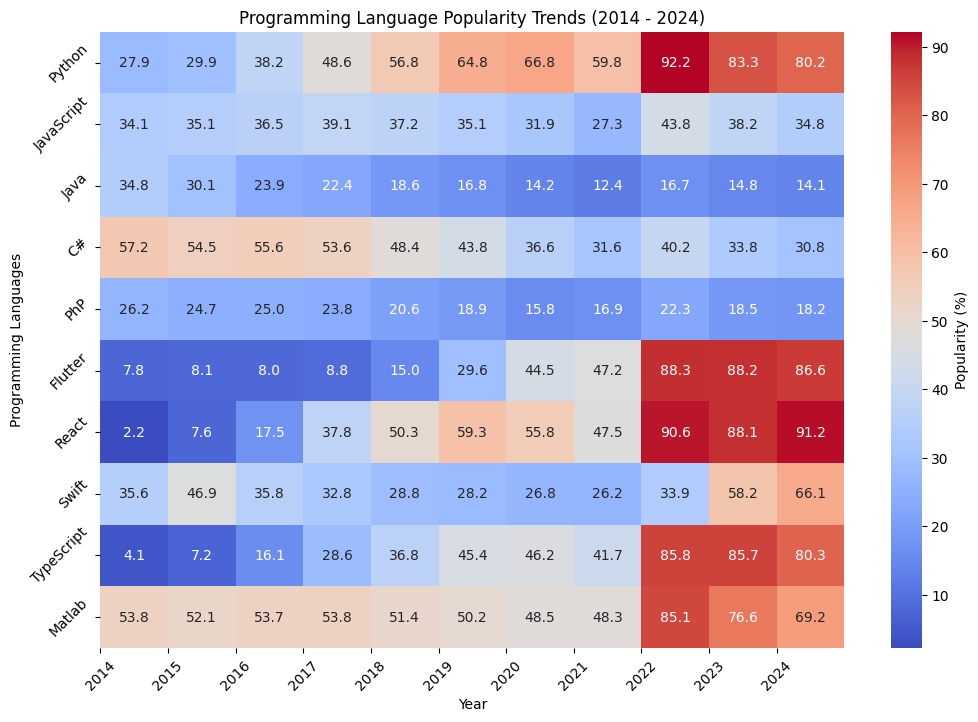

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('q1_dataset.csv')

# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Filter data for years between 2014 and 2024
data_filtered = data[(data['Month'].dt.year >= 2014) & (data['Month'].dt.year <= 2024)]

# Set 'Month' column as the index
data_filtered.set_index('Month', inplace=True)

# Group by year and calculate mean for each language
heatmap_data = data_filtered.resample('Y').mean()

# Clean the column names by removing "Worldwide(%)"
heatmap_data.columns = heatmap_data.columns.str.replace(r' Worldwide\(%\)', '', regex=True)

# Format the x-axis to show only years
heatmap_data.index = heatmap_data.index.year  # Get the year from the datetime index

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Popularity (%)'})
plt.xlabel("Year")
plt.ylabel("Programming Languages")
plt.title("Programming Language Popularity Trends (2014 - 2024)")

# Adjust x-axis ticks to display only years
plt.xticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index, rotation=45)
plt.yticks(rotation=45)

plt.show()


For more major programming languages (e.g., Python, Java, JavaScript, C#)

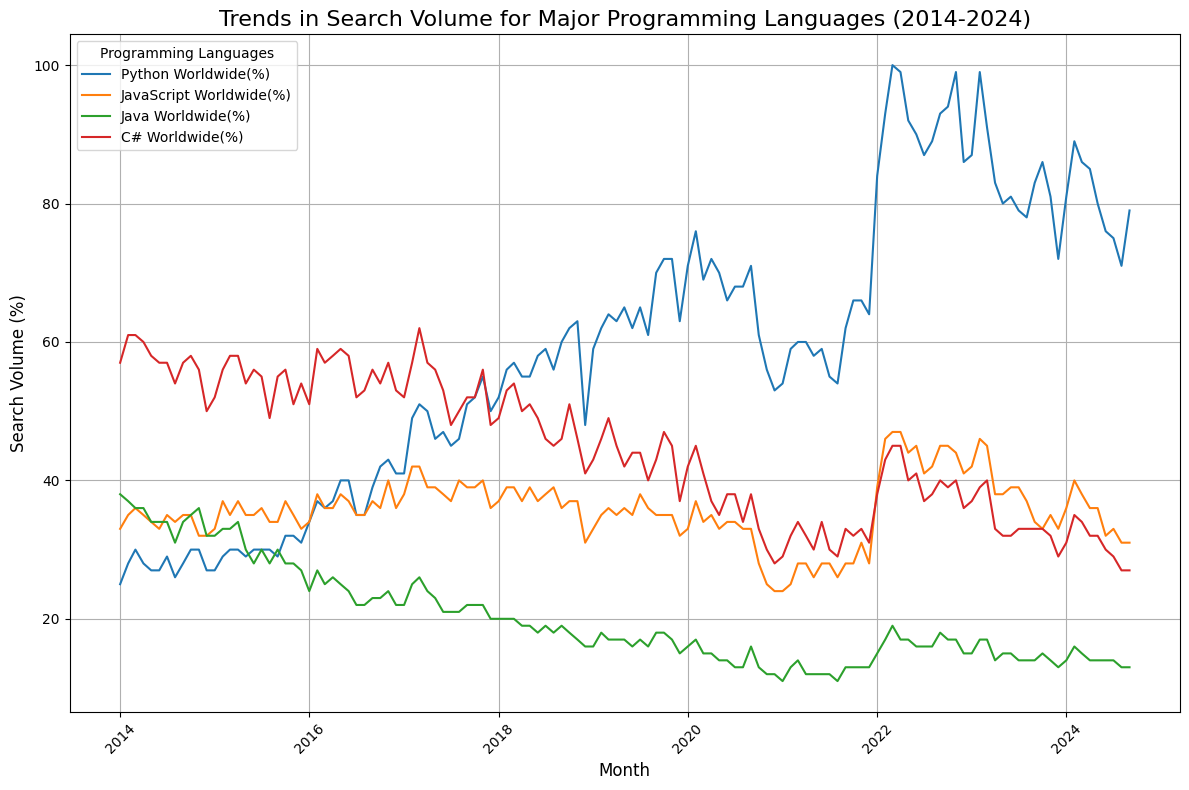

In [2]:
# Filter data for years between 2014 and 2024
data_filtered = data[(data['Month'].dt.year >= 2014) & (data['Month'].dt.year <= 2024)]

# Major programming languages to visualize
major_languages = [
    'Python Worldwide(%)', 'JavaScript Worldwide(%)', 'Java Worldwide(%)', 'C# Worldwide(%)'
]

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title('Trends in Search Volume for Major Programming Languages (2014-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Search Volume (%)', fontsize=12)

# Loop through each major language and plot its trend
for language in major_languages:
    plt.plot(data_filtered['Month'], data_filtered[language], label=language)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Add a legend to identify each language
plt.legend(title='Programming Languages')

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


Other type(heatmap) of representation

<ipython-input-3-629843a287c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = data_filtered.index.year


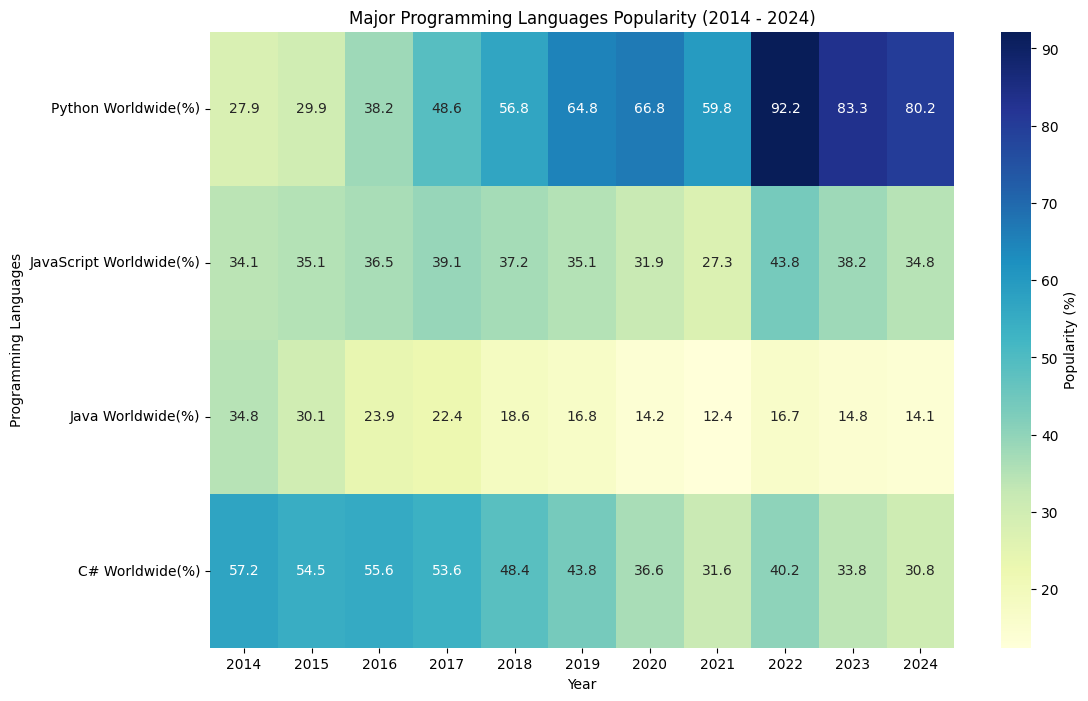

In [3]:
import seaborn as sns

# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Filter for major programming languages only
major_languages = ['Python Worldwide(%)', 'JavaScript Worldwide(%)', 'Java Worldwide(%)', 'C# Worldwide(%)']
data_filtered = data[['Month'] + major_languages]

# Set 'Month' column as index and extract year
data_filtered.set_index('Month', inplace=True)
data_filtered['Year'] = data_filtered.index.year

# Filter data for the last decade (2014-2024)
data_filtered_last_decade = data_filtered[data_filtered['Year'] >= 2014]

# Group by year and calculate the mean for each language
data_yearly_last_decade = data_filtered_last_decade.groupby('Year')[major_languages].mean()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_yearly_last_decade.T, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Popularity (%)'})
plt.xlabel("Year")
plt.ylabel("Programming Languages")
plt.title("Major Programming Languages Popularity (2014 - 2024)")
plt.show()

Additional key statistics

In [4]:
import numpy as np

# Calculate statistics
statistics = {}

for column in data_yearly_last_decade.columns:
    language_data = data_yearly_last_decade[column]
    stats = {
        'mean': language_data.mean(),
        'median': language_data.median(),
        'std_dev': language_data.std(),
        'min': language_data.min(),
        'max': language_data.max(),
        'top_year': language_data.idxmax(),  # Year of maximum popularity
        'min_year': language_data.idxmin()   # Year of minimum popularity
    }
    statistics[column.replace(' Worldwide(%)', '')] = stats

# Display the statistics
for lang, stats in statistics.items():
    print(f"{lang} Statistics:")
    print(f"  Mean Popularity: {stats['mean']:.2f}%")
    print(f"  Median Popularity: {stats['median']:.2f}%")
    print(f"  Standard Deviation: {stats['std_dev']:.2f}")
    print(f"  Minimum Popularity: {stats['min']:.2f}% (Year: {stats['min_year']})")
    print(f"  Maximum Popularity: {stats['max']:.2f}% (Top Year: {stats['top_year']})\n")

Python Statistics:
  Mean Popularity: 58.95%
  Median Popularity: 59.75%
  Standard Deviation: 21.43
  Minimum Popularity: 27.92% (Year: 2014)
  Maximum Popularity: 92.17% (Top Year: 2022)

JavaScript Statistics:
  Mean Popularity: 35.74%
  Median Popularity: 35.08%
  Standard Deviation: 4.19
  Minimum Popularity: 27.33% (Year: 2021)
  Maximum Popularity: 43.83% (Top Year: 2022)

Java Statistics:
  Mean Popularity: 19.88%
  Median Popularity: 16.83%
  Standard Deviation: 7.19
  Minimum Popularity: 12.42% (Year: 2021)
  Maximum Popularity: 34.75% (Top Year: 2014)

C# Statistics:
  Mean Popularity: 44.18%
  Median Popularity: 43.75%
  Standard Deviation: 10.15
  Minimum Popularity: 30.78% (Year: 2024)
  Maximum Popularity: 57.17% (Top Year: 2014)



# **2.Which programming languages are emerging as popular choices among developers today, and what factors contribute to their rise?**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('survey_results_public.csv' )
# Split multiple languages into separate rows
current_lang = data['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
aspirational_lang = data['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Calculate frequency
current_counts = current_lang.value_counts()
aspirational_counts = aspirational_lang.value_counts()

# Combine both into a single DataFrame
lang_trends = pd.DataFrame({
    'Current': current_counts,
    'Aspirational': aspirational_counts
}).fillna(0).sort_values('Aspirational', ascending=False)

# Display top languages
print(lang_trends)

                         Current  Aspirational
Python                     30719         25047
JavaScript                 37492         23774
SQL                        30682         22400
HTML/CSS                   31816         20721
TypeScript                 23150         20239
Rust                        7559         17232
Go                          8103         13837
Bash/Shell (all shells)    20412         13744
C#                         16318         12921
C++                        13827         10873
Java                       18239         10668
C                          12184          8275
Kotlin                      5665          7379
PHP                        10951          5745
PowerShell                  8328          4287
Swift                       2829          3877
Dart                        3594          3709
Zig                          667          3688
Lua                         3728          3322
Assembly                    3233          3007
Elixir       

<Figure size 1200x600 with 0 Axes>

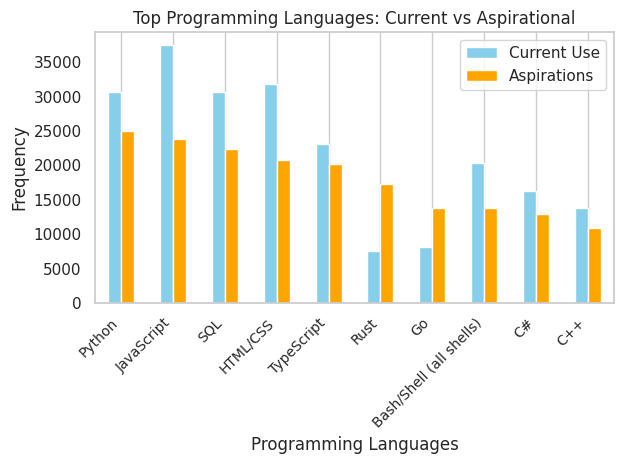

In [15]:
# Select top 10 programming languages
top_langs = lang_trends.head(10)
# Bar plot
plt.figure(figsize=(12, 6))
top_langs.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Top Programming Languages: Current vs Aspirational')
plt.ylabel('Frequency')
plt.xlabel('Programming Languages')
plt.legend(['Current Use', 'Aspirations'])
plt.grid(axis='y')

# Adjust x-ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

# **3.How do the popularity trends of programming languages vary across different industries (e.g., web development, data science, game development)?**

<ipython-input-5-e9789c2684cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';').explode().reset_index(drop=True)
<ipython-input-5-e9789c2684cd>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['Industry'] = exploded_data['DevType'].map(industry_mapping)


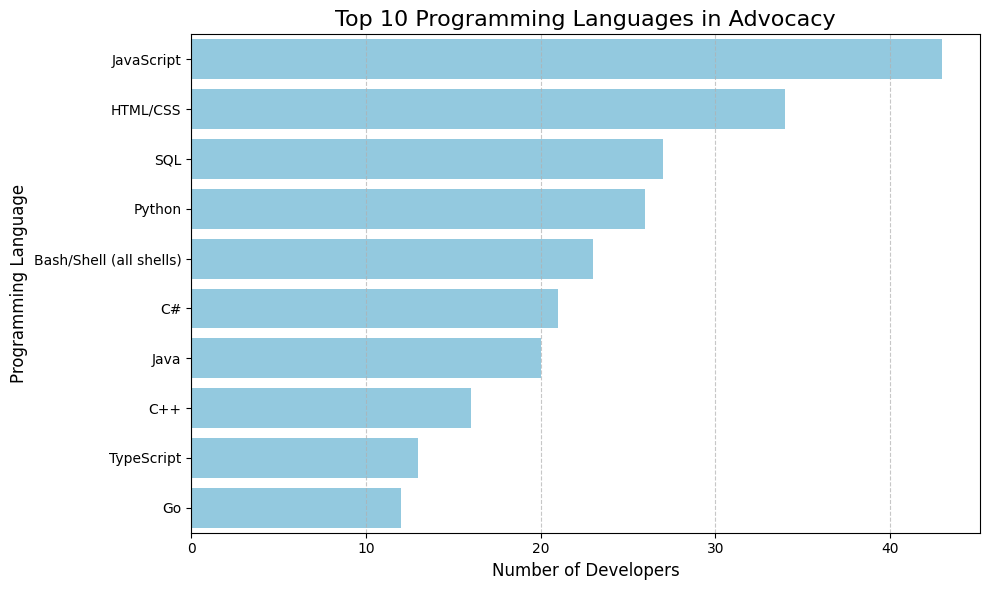

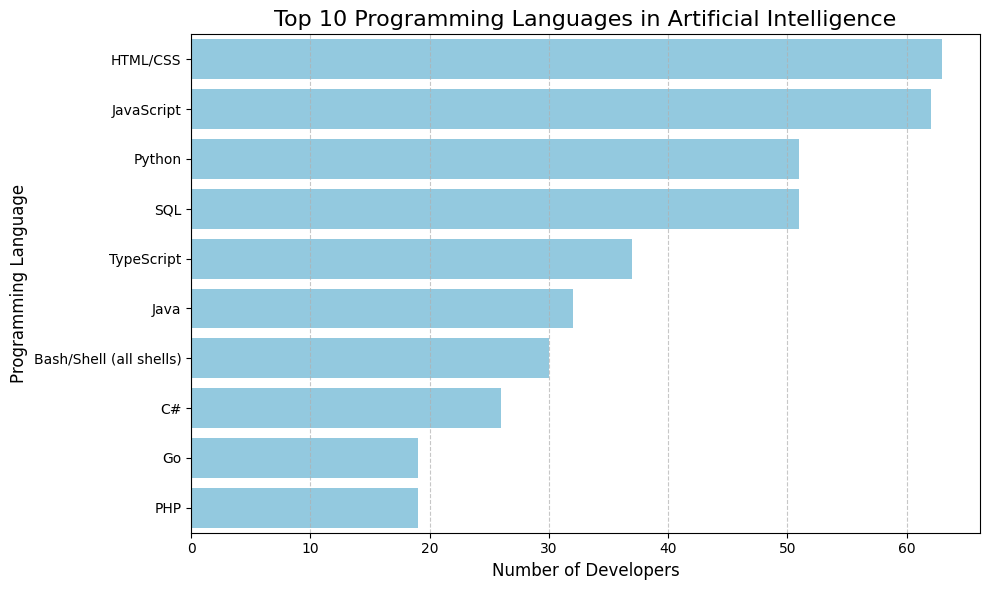

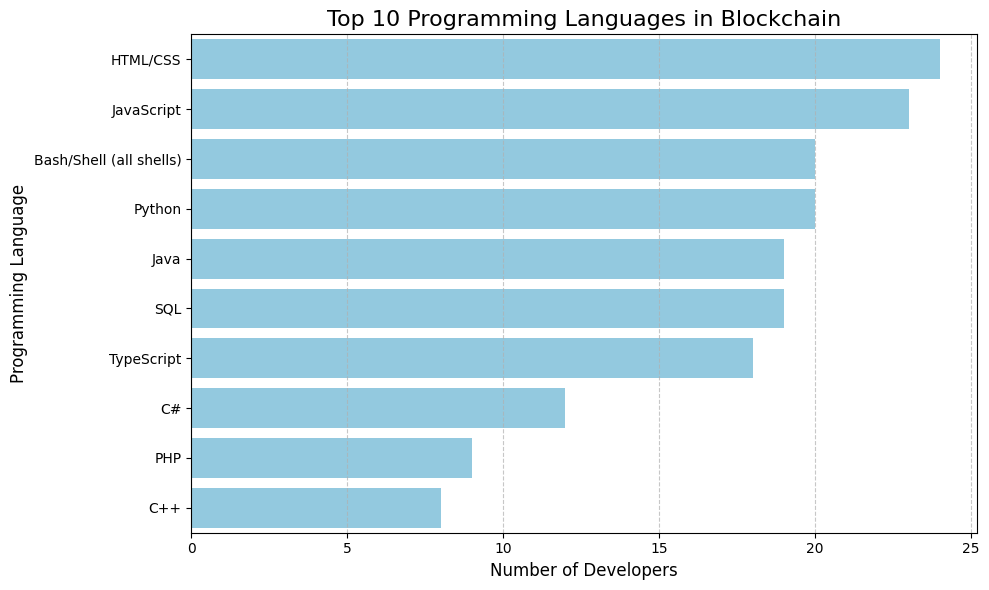

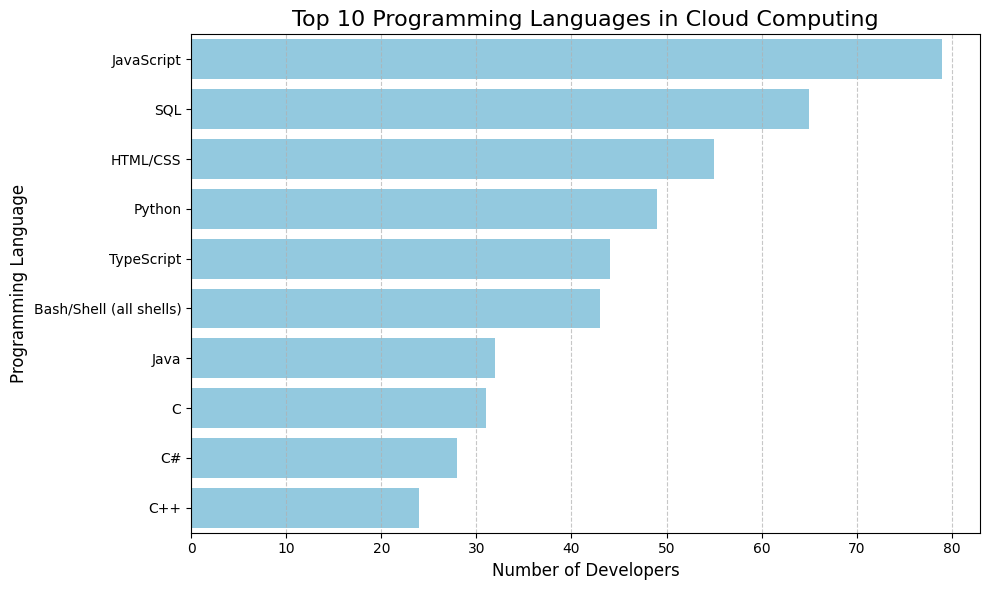

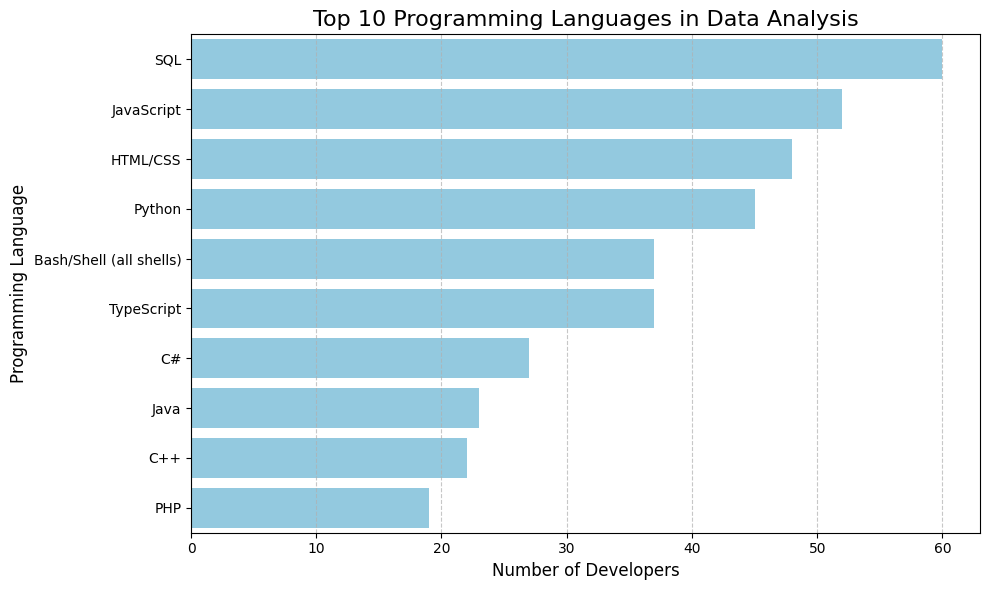

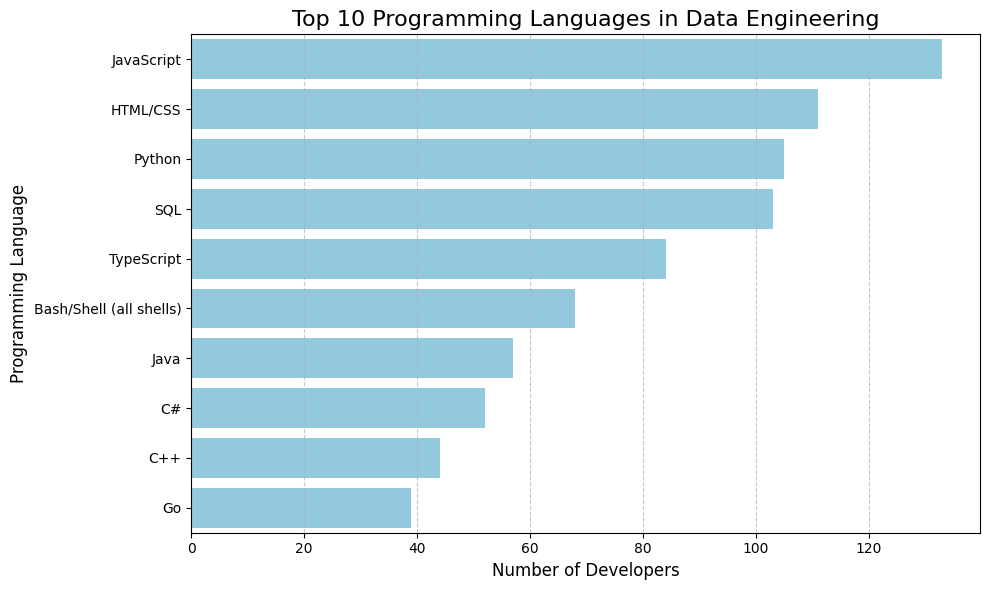

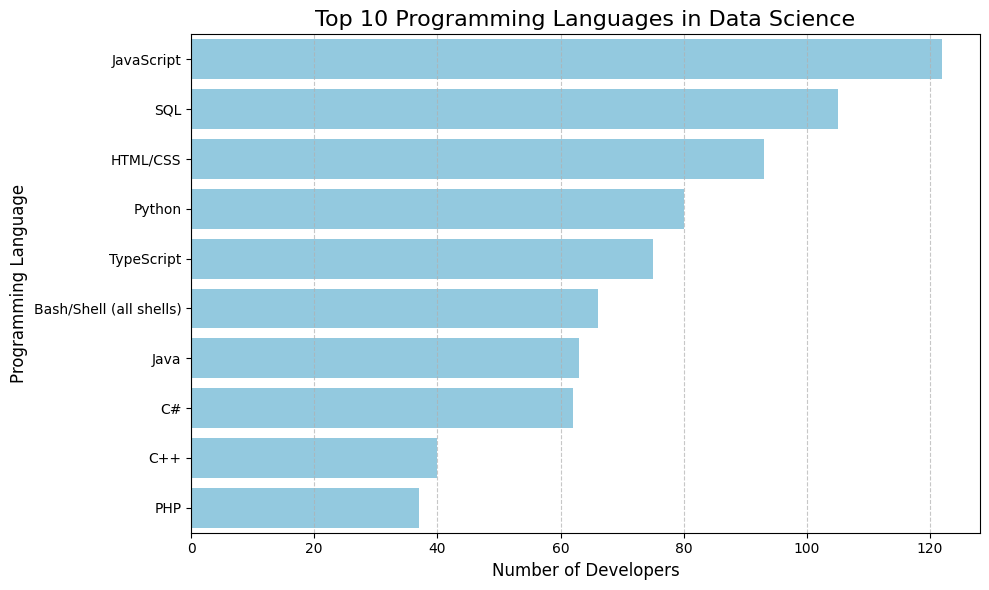

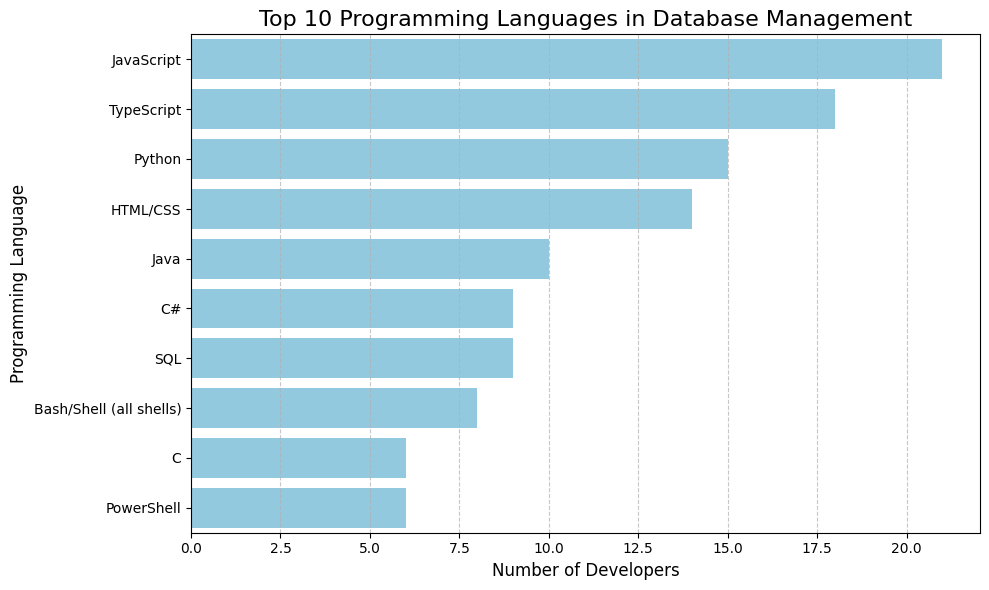

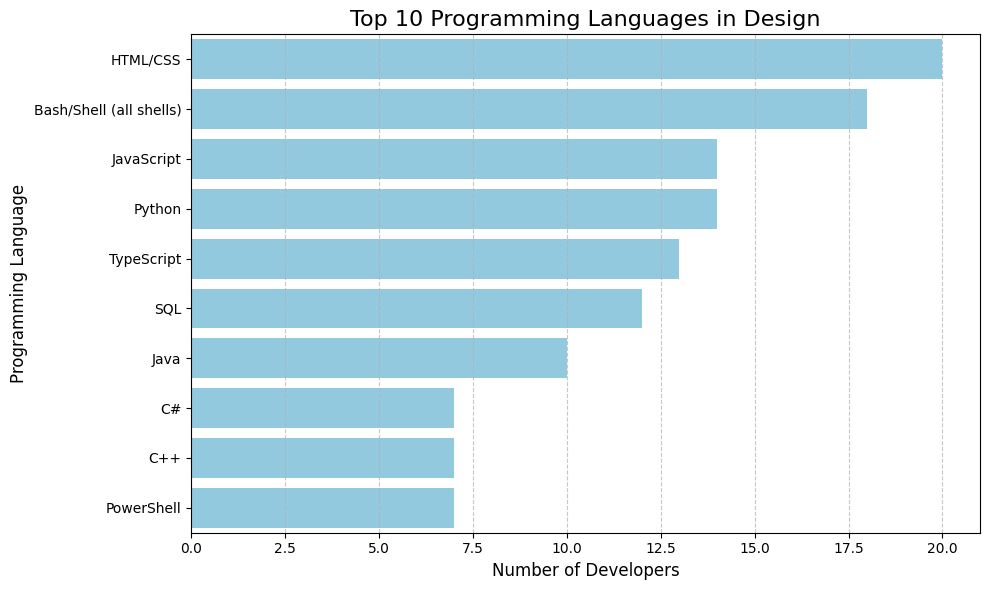

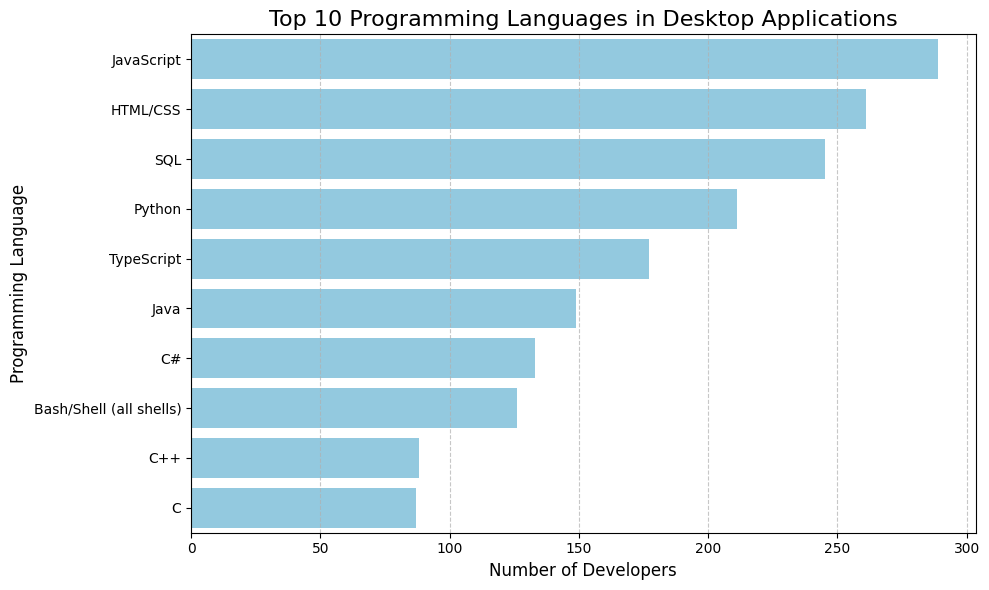

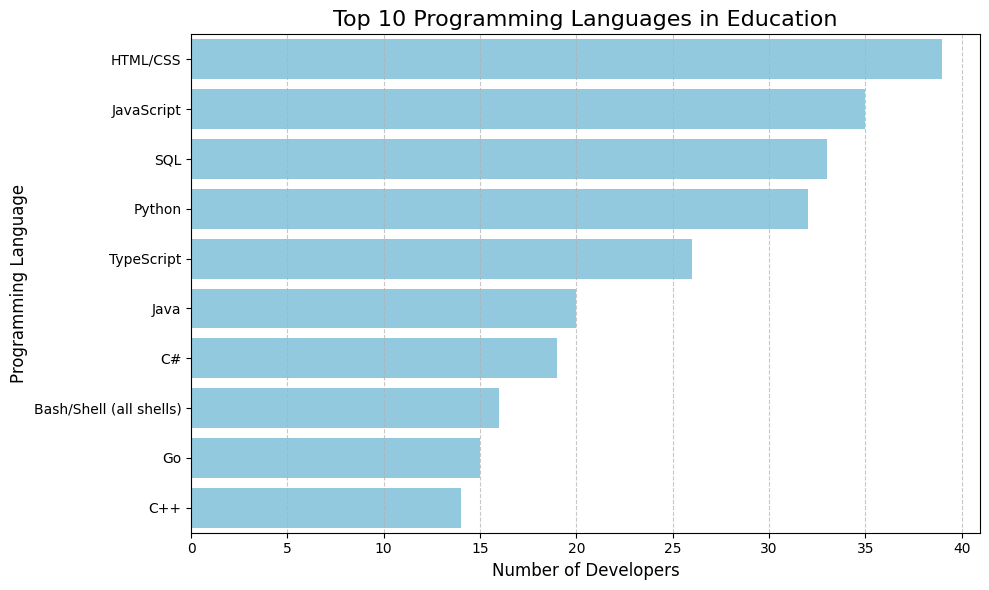

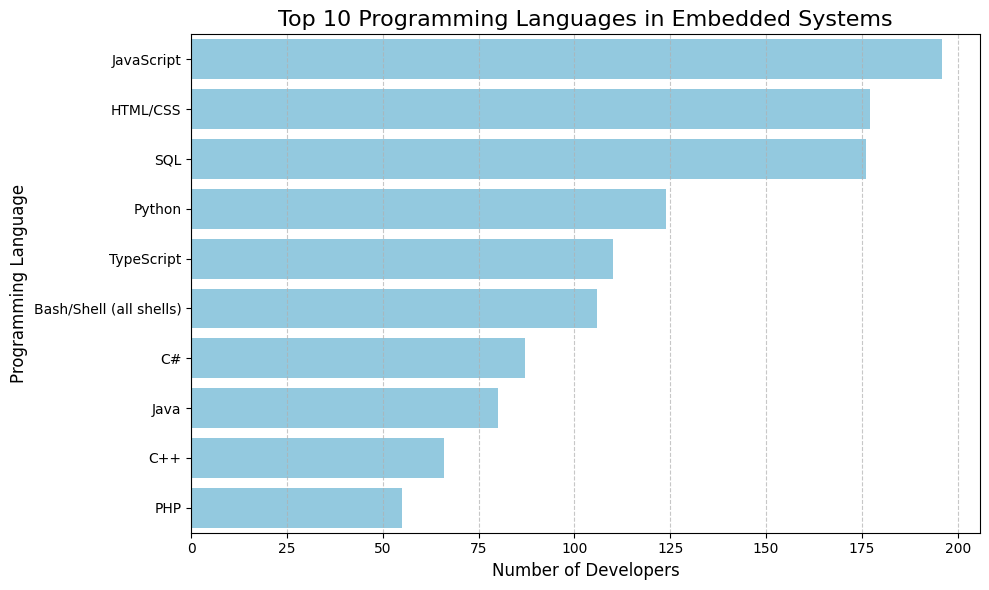

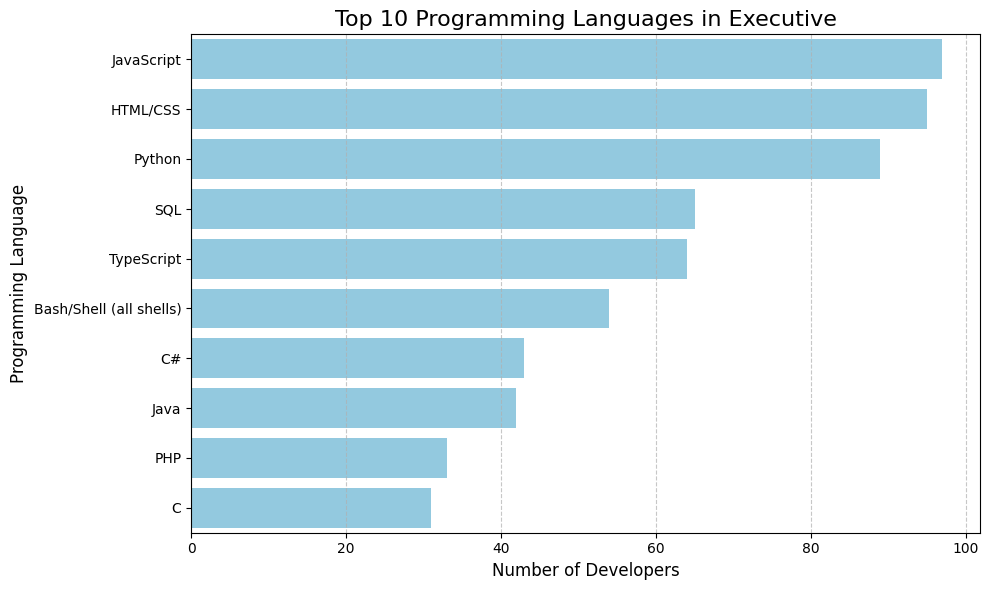

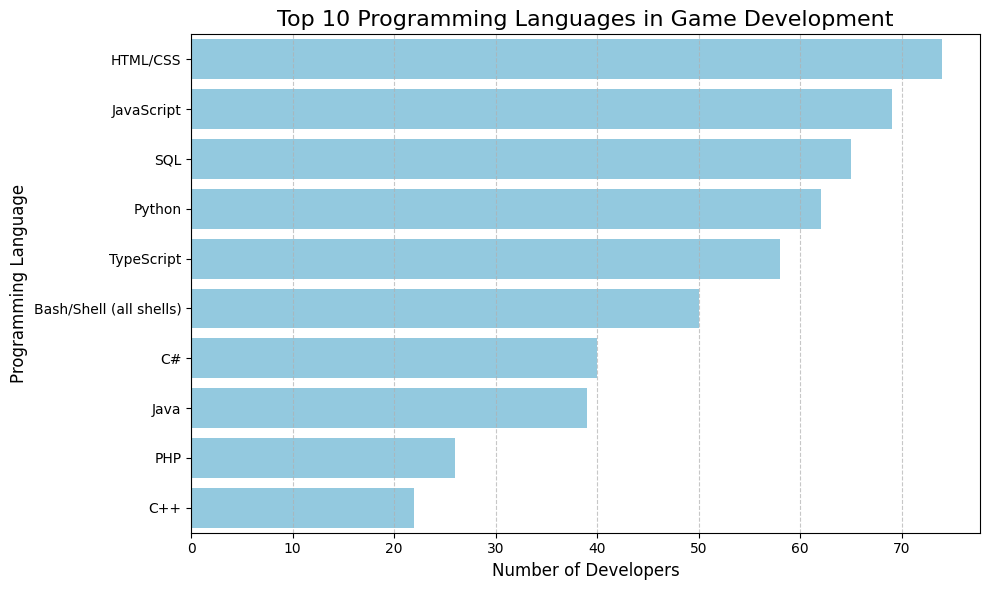

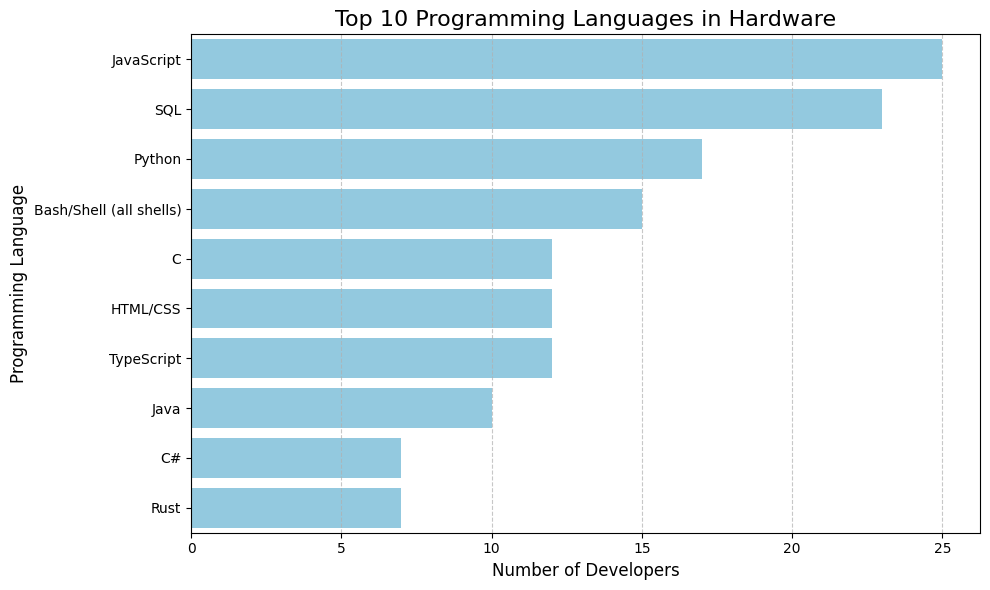

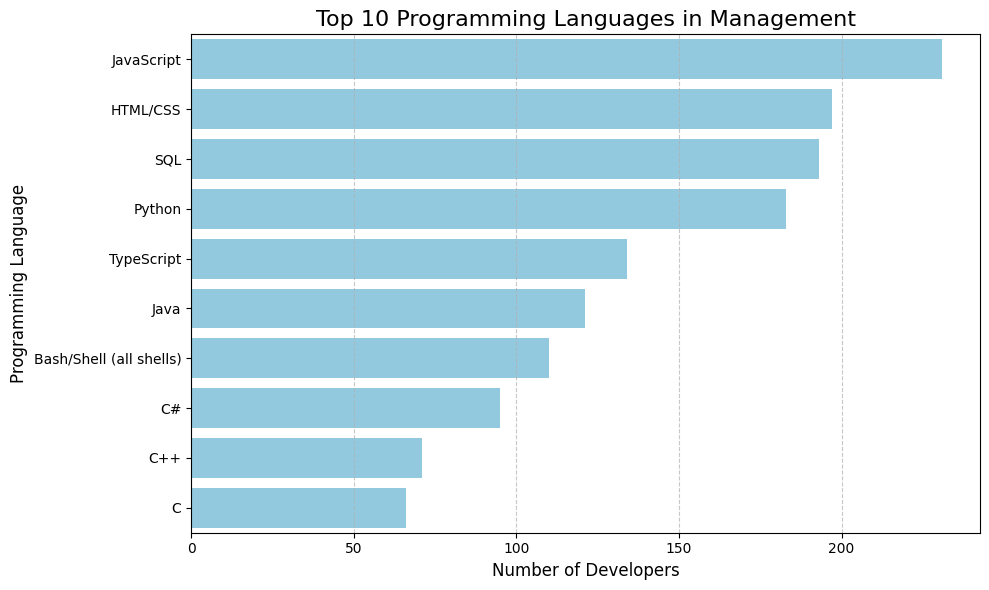

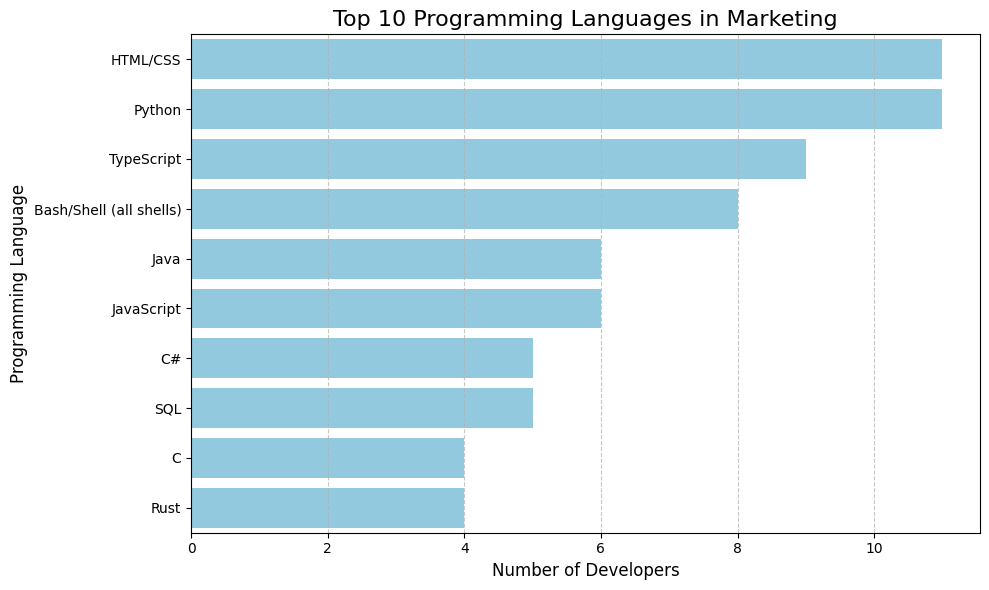

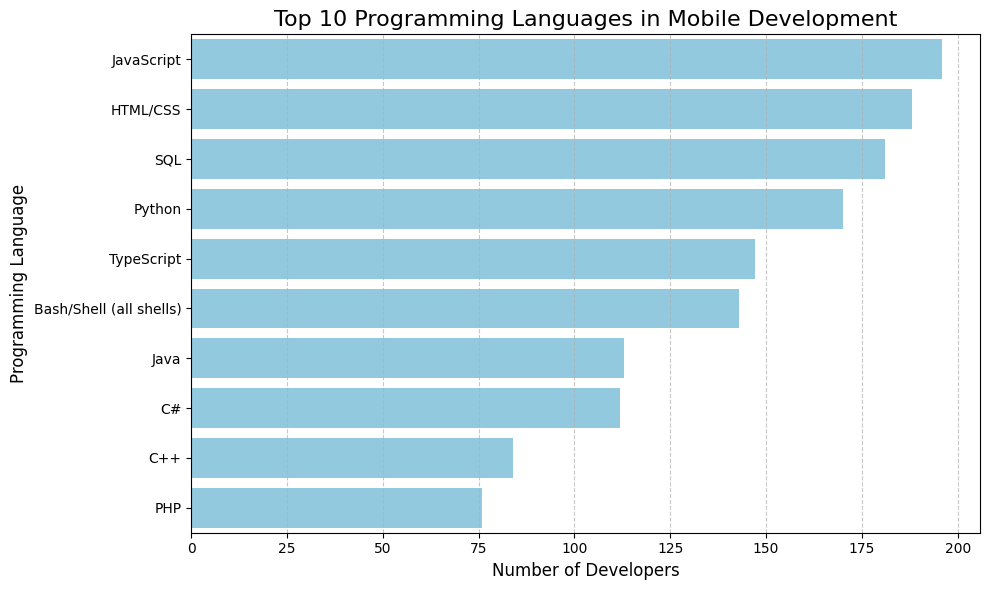

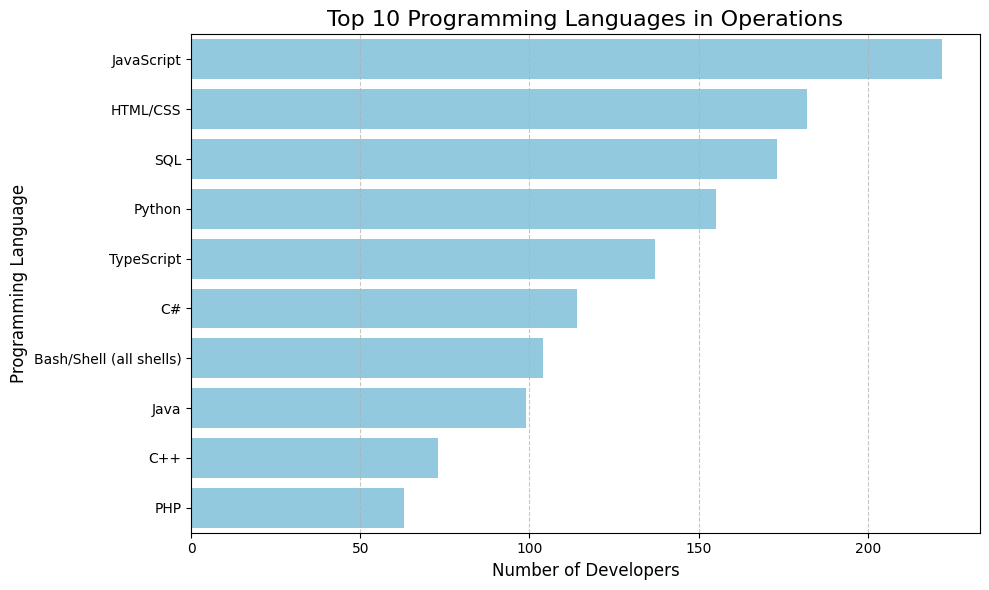

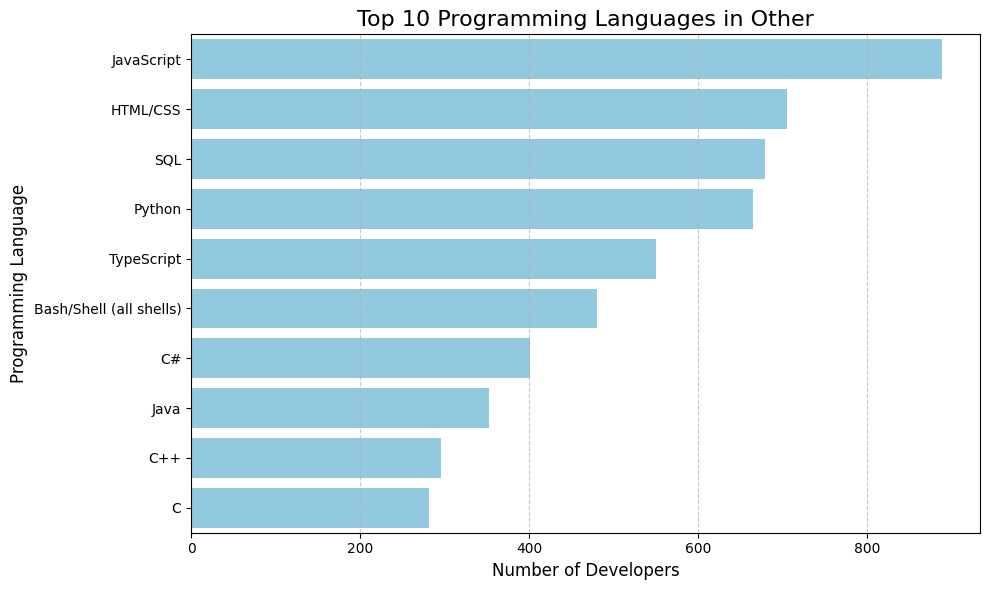

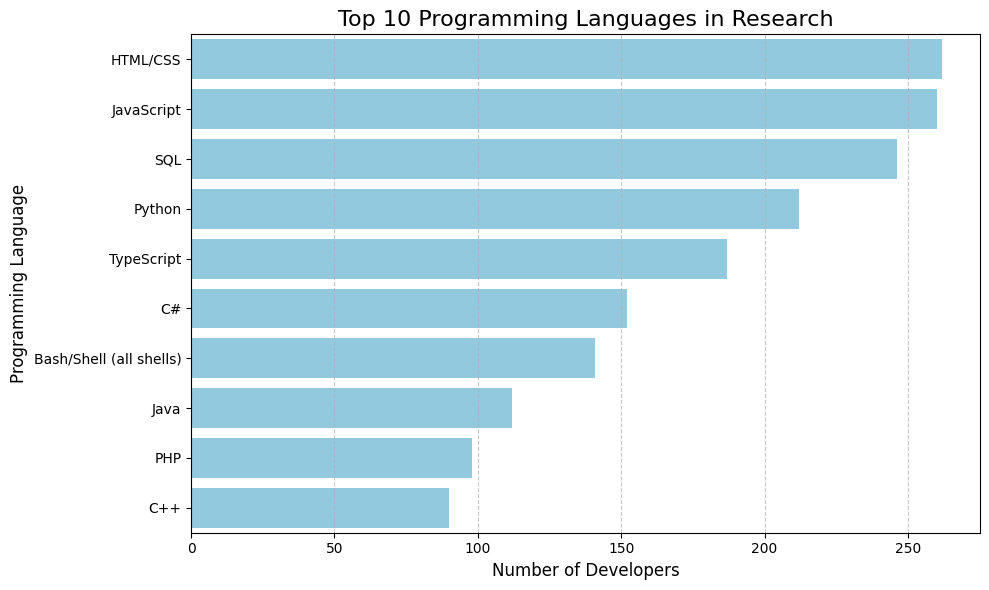

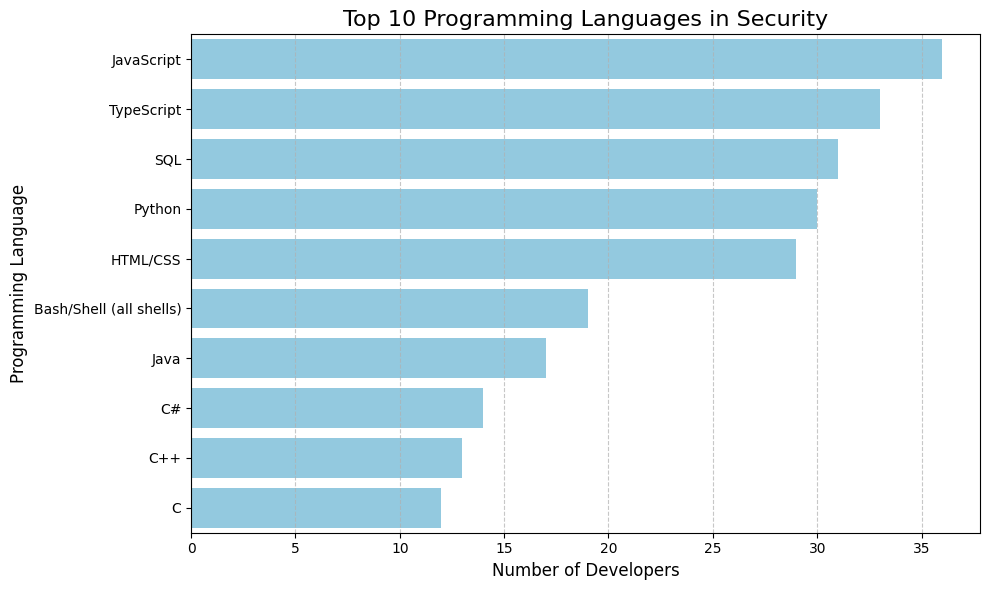

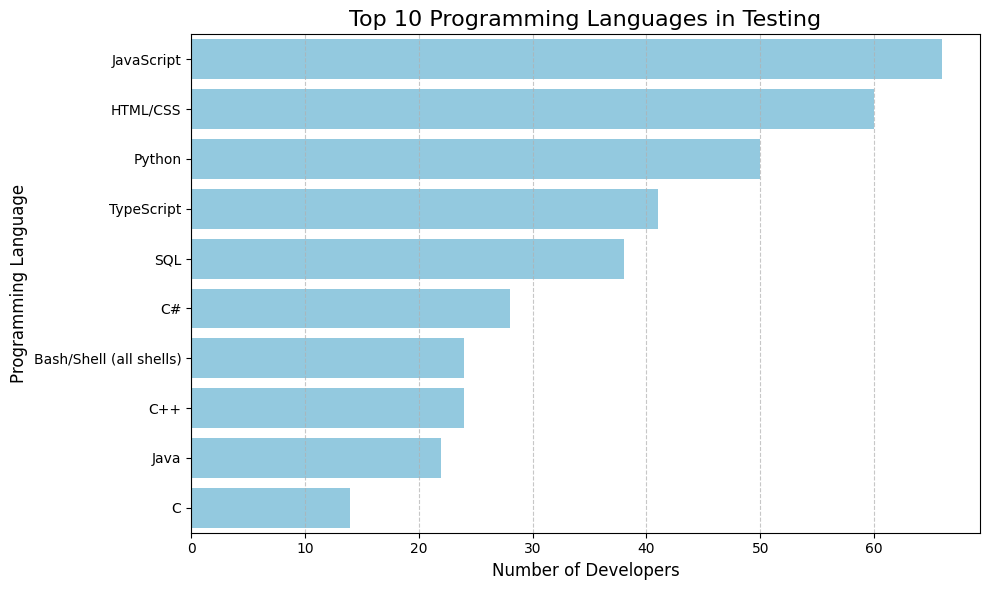

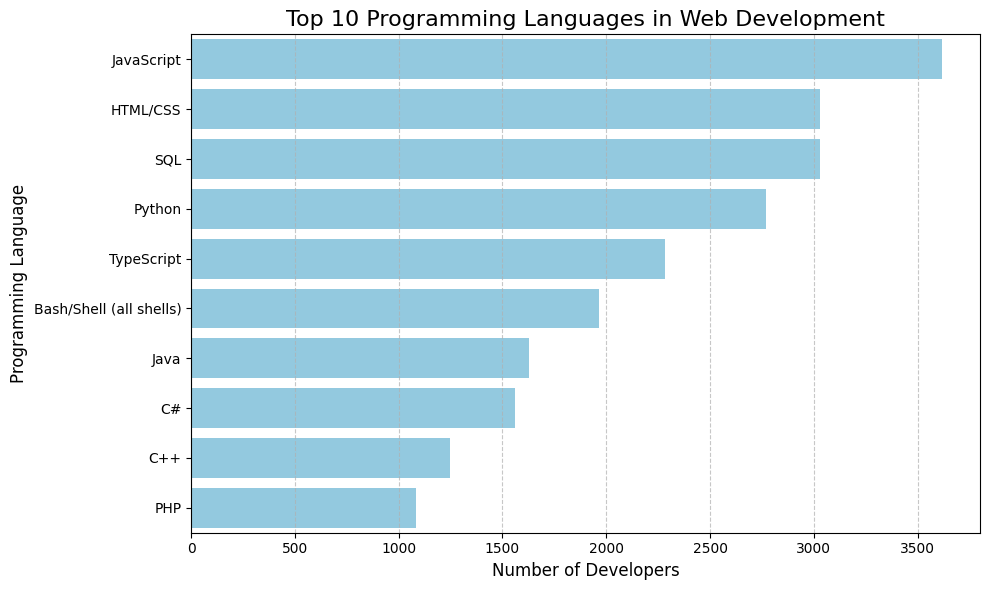

In [5]:
# Load dataset
data = pd.read_csv('survey_results_public.csv' )


# Split multiple languages into separate rows for both 'LanguageHaveWorkedWith' and 'DevType'
exploded_data = data.dropna(subset=['LanguageHaveWorkedWith', 'DevType'])
exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';').explode().reset_index(drop=True)


industry_mapping = {
    'Developer, full-stack': 'Web Development',
    'Developer, back-end': 'Web Development',
    'Developer, front-end': 'Web Development',
    'Developer, mobile': 'Mobile Development',
    'Developer, game or graphics': 'Game Development',
    'Developer, embedded applications or devices': 'Embedded Systems',
    'Data scientist or machine learning specialist': 'Data Science',
    'Database administrator': 'Database Management',
    'Cloud infrastructure engineer': 'Cloud Computing',
    'DevOps specialist': 'Operations',
    'Engineer, site reliability': 'Operations',
    'System administrator': 'Operations',
    'Security professional': 'Security',
    'Developer, AI': 'Artificial Intelligence',
    'Data or business analyst': 'Data Analysis',
    'Data engineer': 'Data Engineering',
    'Academic researcher': 'Research',
    'Research & Development role': 'Research',
    'Educator': 'Education',
    'Project manager': 'Management',
    'Engineering manager': 'Management',
    'Product manager': 'Management',
    'Developer Advocate': 'Advocacy',
    'Developer Experience': 'Advocacy',
    'Designer': 'Design',
    'Blockchain': 'Blockchain',
    'Marketing or sales professional': 'Marketing',
    'Hardware Engineer': 'Hardware',
    'Scientist': 'Research',
    'Senior Executive (C-Suite, VP, etc.)': 'Executive',
    'Developer, desktop or enterprise applications': 'Desktop Applications',
    'Developer, QA or test': 'Testing',
    'Other (please specify):': 'Other',
    'Student': 'Other',
}

# Map expanded industry categories
exploded_data['Industry'] = exploded_data['DevType'].map(industry_mapping)

# Drop rows with missing values
industry_data = exploded_data.dropna(subset=['Industry', 'LanguageHaveWorkedWith'])

# Group by industry and language, then count occurrences
industry_language_popularity = (
    industry_data.groupby(['Industry', 'LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
)

# Filter top 10 languages for each industry
industry_language_popularity = (
    industry_language_popularity.sort_values(['Industry', 'Count'], ascending=[True, False])
    .groupby('Industry')
    .head(10)
)

# Check if there is data for visualization
if not industry_language_popularity.empty:
    # Loop through each unique industry
    industries = industry_language_popularity['Industry'].unique()
    for industry in industries:
        # Filter data for the current industry
        industry_data = industry_language_popularity[industry_language_popularity['Industry'] == industry]

        # Plot for the current industry
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=industry_data,
            x="Count",
            y="LanguageHaveWorkedWith",
            color="skyblue"
        )
        plt.title(f"Top 10 Programming Languages in {industry}", fontsize=16)
        plt.xlabel("Number of Developers", fontsize=12)
        plt.ylabel("Programming Language", fontsize=12)
        plt.tight_layout()
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # You can customize the grid style here
        plt.show()
else:
    print("No data available for visualization.")

# **4.How do regional differences affect the popularity of programming languages globally?**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 15.1 MB/s eta 0:00:00
                                             Country      Continent
0                           United States of America  North America
1  United Kingdom of Great Britain and Northern I...         Europe
2  United Kingdom of Great Britain and Northern I...         Europe
3                                             Canada  North America
4                                             Norway         Europe


<ipython-input-7-8f85c7416d7a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Languages'] = data['LanguageHaveWorkedWith'].str.split(';')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1500x1000 with 0 Axes>

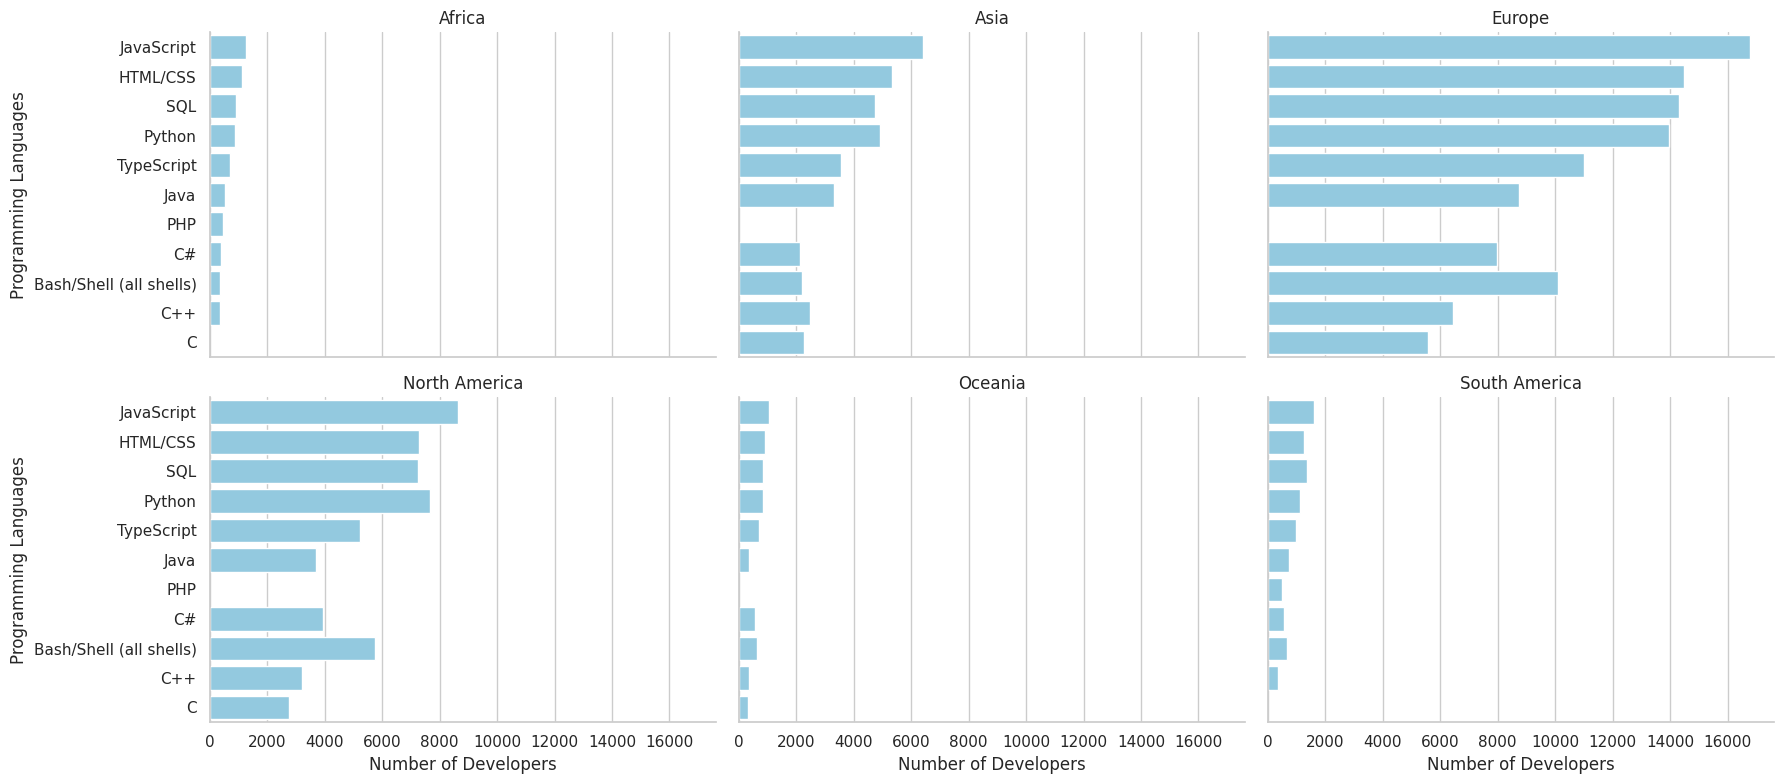

In [7]:
!pip install pycountry_convert
import pycountry_convert as pc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert country name to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)  # Get country code
        continent = pc.country_alpha2_to_continent_code(country_alpha2)  # Get continent code
        continent_mapping = {
            'AF': 'Africa',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'OC': 'Oceania',
            'SA': 'South America'
        }
        return continent_mapping.get(continent)  # Return continent name, None if not found
    except:
        return None  # Return None if an error occurs

# Map the 'Country' column to 'Continent'
data['Continent'] = data['Country'].apply(country_to_continent)

# Drop rows where continent is None (i.e., unknown countries)
data = data.dropna(subset=['Continent'])

# Check the first few rows to ensure the 'Continent' column is created
print(data[['Country', 'Continent']].head())

# Now proceed with your original code for exploding languages and grouping by continent
data['Languages'] = data['LanguageHaveWorkedWith'].str.split(';')
exploded_data = data.explode('Languages')

# Group by 'Continent' and 'Languages' and count occurrences
continent_language_counts = exploded_data.groupby(['Continent', 'Languages']).size().reset_index(name='Count')

# Sort by 'Count' within each continent and get the top 10 languages
top_languages_by_continent = continent_language_counts.sort_values(by=['Continent', 'Count'], ascending=[True, False])
top_10_languages_by_continent = top_languages_by_continent.groupby('Continent').head(10)

# Visualization with FacetGrid
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

g = sns.FacetGrid(top_10_languages_by_continent, col='Continent', col_wrap=3, height=4, aspect=1.5)
g.map(sns.barplot, 'Count', 'Languages', color='skyblue')

g.set_axis_labels('Number of Developers', 'Programming Languages')
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

# **5.How do average salaries for developers vary across different programming languages?**

<ipython-input-8-01fa9a0c1ddd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')
<ipython-input-8-01fa9a0c1ddd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ConvertedCompYearly', y='LanguageHaveWorkedWith', data=avg_salary_by_language, palette='viridis')


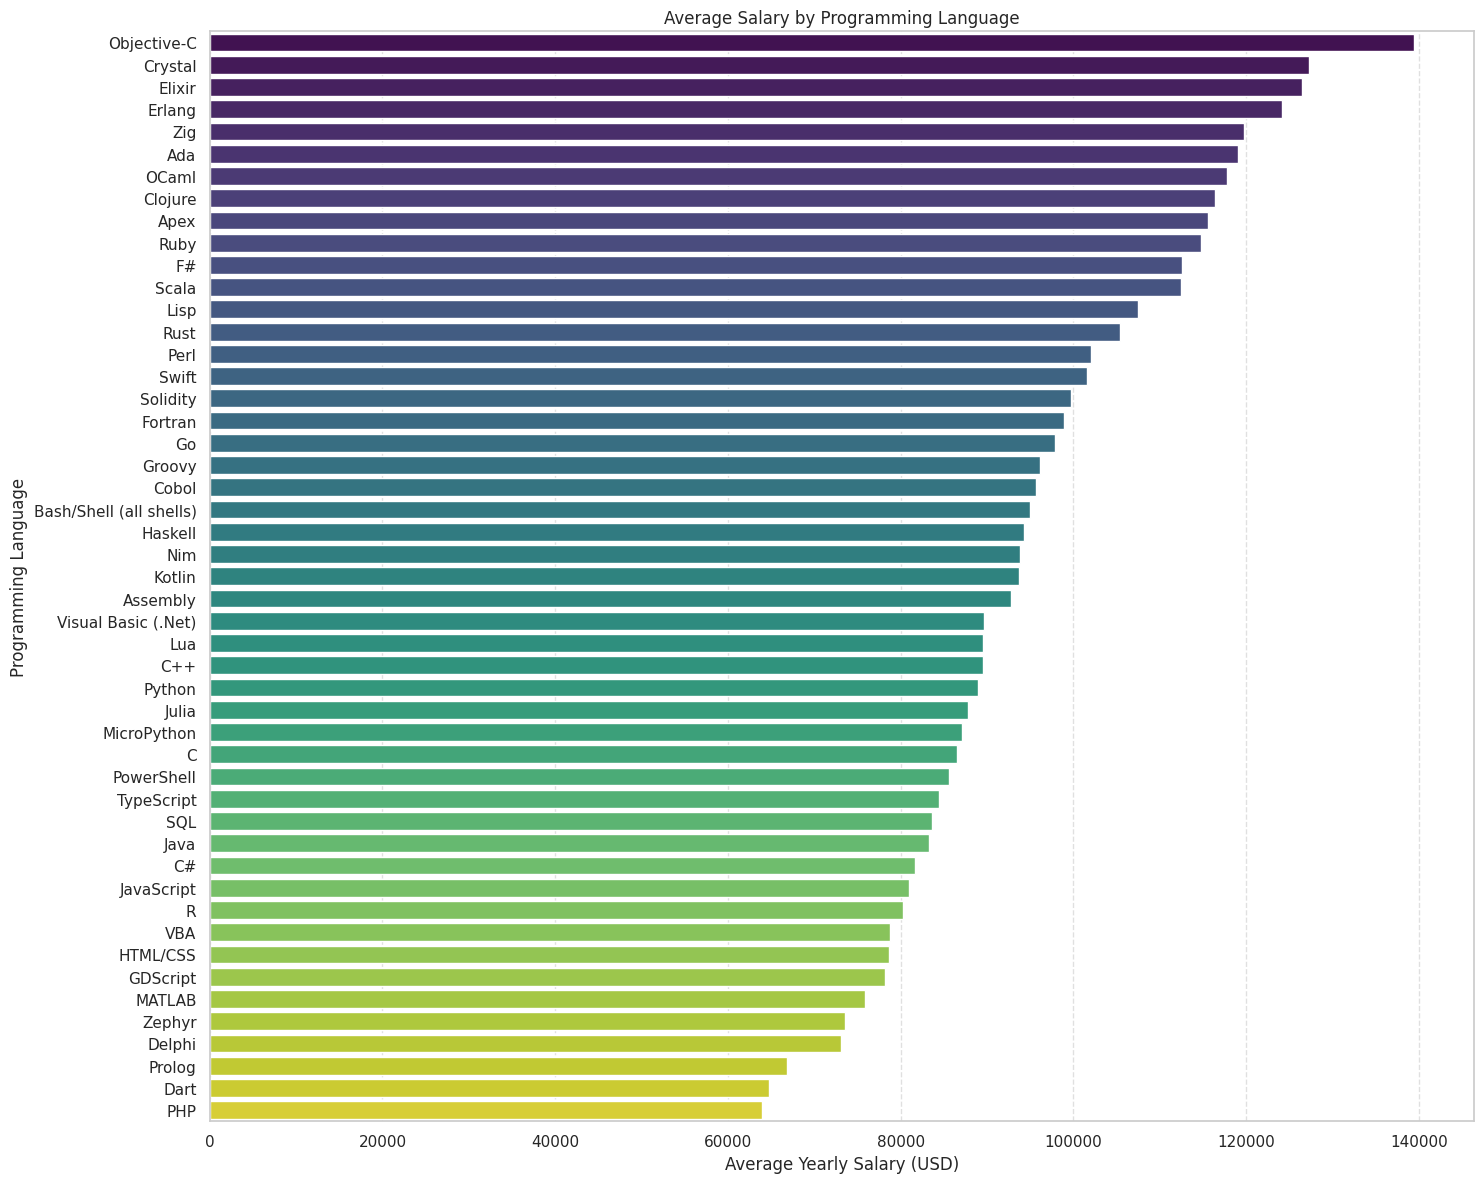

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
stackoverflow_data = pd.read_csv("survey_results_public.csv")

# Step 1: Explode the 'LanguageHaveWorkedWith' column to separate each language
exploded_data = stackoverflow_data.dropna(subset=['ConvertedCompYearly', 'LanguageHaveWorkedWith'])
exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')
exploded_data = exploded_data.explode('LanguageHaveWorkedWith')

# Step 2: Group by 'LanguageHaveWorkedWith' and calculate the average salary
avg_salary_by_language = exploded_data.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

# Step 3: Sort by average salary in descending order
avg_salary_by_language = avg_salary_by_language.sort_values(by='ConvertedCompYearly', ascending=False)

# Step 4: Visualization for all programming languages
plt.figure(figsize=(15, 12))
sns.barplot(x='ConvertedCompYearly', y='LanguageHaveWorkedWith', data=avg_salary_by_language, palette='viridis')
plt.title('Average Salary by Programming Language')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Programming Language')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # grid on x-axis, dashed lines, semi-transparent

plt.tight_layout()
plt.show()

# **Training data**

In [9]:
import pandas as pd

# Step 1: Load and clean data
stackoverflow_data = pd.read_csv("survey_results_public.csv")

# Drop rows with missing values in 'LanguageHaveWorkedWith'
exploded_data = stackoverflow_data.dropna(subset=['LanguageHaveWorkedWith', 'ConvertedCompYearly'])

# Explode the 'LanguageHaveWorkedWith' column to separate languages
exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')
exploded_data = exploded_data.explode('LanguageHaveWorkedWith')

# Step 2: Count frequency of each programming language
language_popularity = exploded_data['LanguageHaveWorkedWith'].value_counts().reset_index()
language_popularity.columns = ['Language', 'Frequency']

# Add a rank column based on popularity
language_popularity['Rank'] = language_popularity['Frequency'].rank(ascending=False).astype(int)

# Display the top 15 programming languages by popularity
print(language_popularity)

<ipython-input-9-aae5e88998fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')


                   Language  Frequency  Rank
0                JavaScript      14754     1
1                       SQL      12890     2
2                  HTML/CSS      12124     3
3                    Python      11407     4
4                TypeScript       9968     5
5   Bash/Shell (all shells)       8537     6
6                      Java       6657     7
7                        C#       6599     8
8                       C++       4369     9
9                       PHP       4134    10
10                        C       3622    11
11               PowerShell       3487    12
12                       Go       3471    13
13                     Rust       2914    14
14                   Kotlin       2183    15
15                     Ruby       1372    16
16                     Dart       1262    17
17                      Lua       1236    18
18                    Swift       1079    19
19                        R        939    20
20      Visual Basic (.Net)        911    21
21        

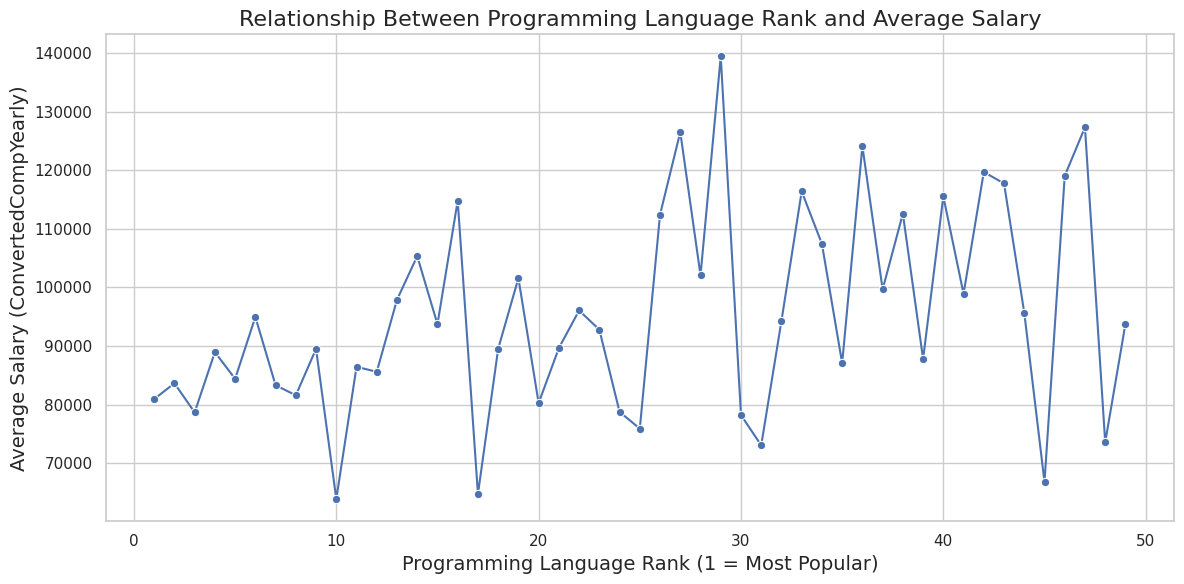

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Map rank to each record in the dataset
language_rank_map = dict(zip(language_popularity['Language'], language_popularity['Rank']))
exploded_data['LanguageRank'] = exploded_data['LanguageHaveWorkedWith'].map(language_rank_map)

# Step 2: Group data by rank and calculate the average salary
salary_by_rank = (
    exploded_data.groupby('LanguageRank')['ConvertedCompYearly']
    .mean()
    .reset_index()
    .dropna()
)

# Rename columns for clarity
salary_by_rank.columns = ['Rank', 'AverageSalary']

# Step 3: Visualization of salary vs. language rank
plt.figure(figsize=(12, 6))
sns.lineplot(data=salary_by_rank, x='Rank', y='AverageSalary', marker='o')
plt.title('Relationship Between Programming Language Rank and Average Salary', fontsize=16)
plt.xlabel('Programming Language Rank (1 = Most Popular)', fontsize=14)
plt.ylabel('Average Salary (ConvertedCompYearly)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest regression Model

<ipython-input-11-615217466c7f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')  #  semicolon as separator


Mean Squared Error: 3267360.2452702853
R-squared: 0.9778777254907078


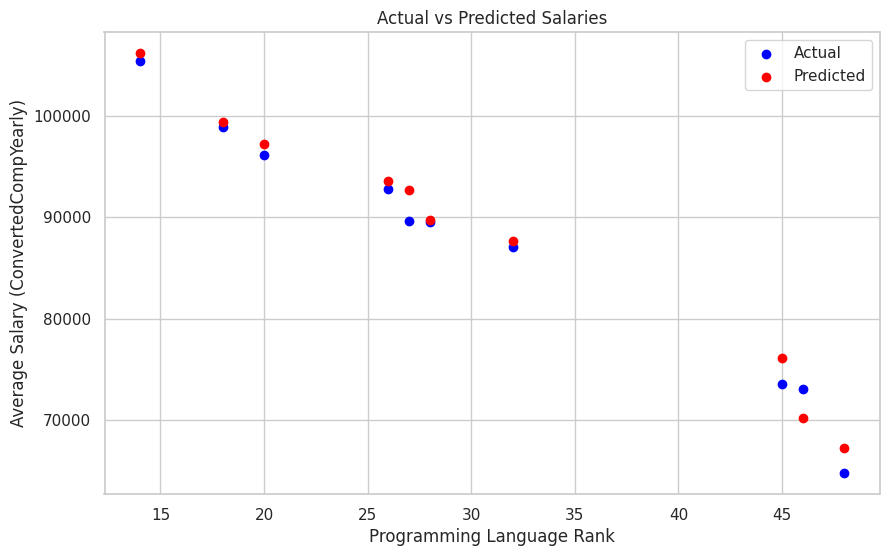

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load my data
stackoverflow_data = pd.read_csv("survey_results_public.csv")

# Step 1: Prepare the data
# Explode the 'LanguageHaveWorkedWith' column
exploded_data = stackoverflow_data.dropna(subset=['ConvertedCompYearly', 'LanguageHaveWorkedWith'])
exploded_data['LanguageHaveWorkedWith'] = exploded_data['LanguageHaveWorkedWith'].str.split(';')  #  semicolon as separator
exploded_data = exploded_data.explode('LanguageHaveWorkedWith')

# Calculate average salary by language and rank them
avg_salary_by_language = (
    exploded_data.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly']
    .mean()
    .reset_index()
    .sort_values(by='ConvertedCompYearly', ascending=False)
)
avg_salary_by_language['Rank'] = range(1, len(avg_salary_by_language) + 1)

# Step 2: Prepare data for modeling
X = avg_salary_by_language[['Rank']]  # Rank as the feature
y = avg_salary_by_language['ConvertedCompYearly']  # Salary as the target

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Programming Language Rank')
plt.ylabel('Average Salary (ConvertedCompYearly)')
plt.legend()
plt.grid(True)
plt.show()

**Linear regression Model**

Mean Squared Error (Linear Regression): 12435636.66692457
R-squared (Linear Regression): 0.9158021927818472


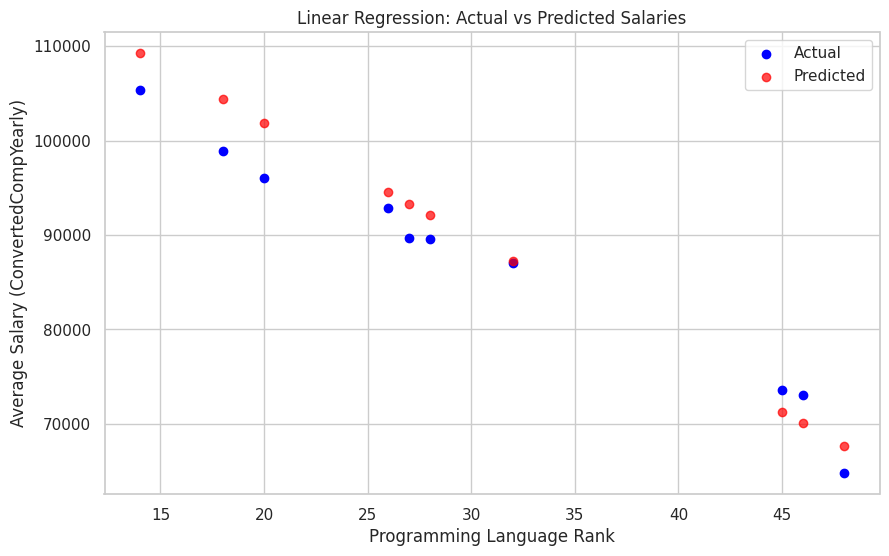

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Preparation (reuse `avg_salary_by_language` from earlier steps)
# Ensure avg_salary_by_language is defined (same DataFrame as above)

X = avg_salary_by_language[['Rank']]  # Rank as the feature
y = avg_salary_by_language['ConvertedCompYearly']  # Salary as the target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = linear_reg_model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R-squared (Linear Regression): {r_squared}")

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted Salaries')
plt.xlabel('Programming Language Rank')
plt.ylabel('Average Salary (ConvertedCompYearly)')
plt.legend()
plt.grid(True)
plt.show()